In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [2]:
#Read the data set
tweets=pd.read_csv("Elon_musk.csv",sep=',',encoding='latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets.head(6)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj


# EDA

In [3]:
len(tweets.index)

1999

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [5]:
tweets.describe()

,Text
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [6]:
tweets.sample()

,Text
1816,Goal of government should be to maximize the h...


In [7]:
tweets.tail(3)

,Text
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,Progress update August 28


In [8]:
tweets.isna().sum()

Text    0
dtype: int64

Text(0, 0.5, 'Count')

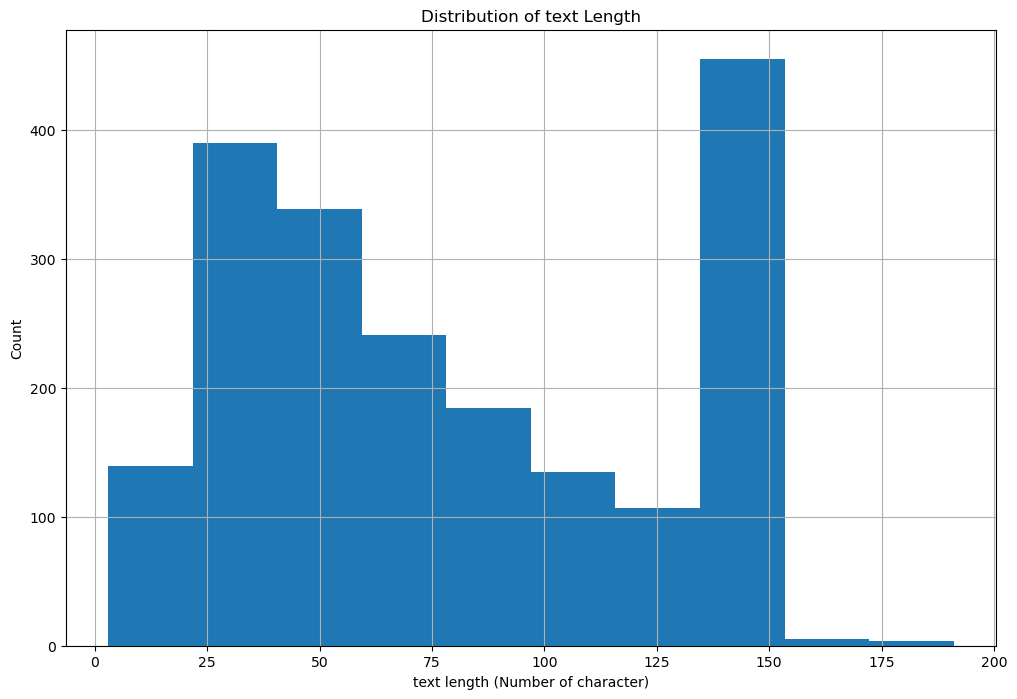

In [9]:
text_length =tweets["Text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

# Text Preprocessing and Stemming

In [10]:
for i in tweets.Text:
  print(i.strip())

@kunalb11 Im an alien
@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated
@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
Happy New Year of the Ox! https://t.co/9WFKMYu2oj
Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM
@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely
@GiveDirectly Just sent some
Just agree to do Clubhouse with @kanyewest
https://t.co/3rWE9uHSTS
@geoffkeighley @UnrealEngine Its getting real
Bought some Dogecoin for lil X, so he can be a toddler hodler
@JoshManMode He definitely has issues, but the sentencing seems a bit high
@freewalletorg Thanks for fixing
@freewalletorg Please unlock my account
@AstroJordy <U+0001F923><U+0001F923

In [11]:
tweets2 = [x.strip() for x in tweets.Text]
# remove both the leading and the trailing characters

In [12]:
tweets2

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [13]:
tweets2 = [x for x in tweets2 if x] # removes empty strings, because they are considered in Python as False
tweets2[0:10] 

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [14]:
# Joining the list into one string/text
text = ' '.join(tweets2)
print(text) 

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'are replaced by 
# characters in 'y'. 'z'is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#Tokenization: Natuaral Langauage Toolkit
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens) 

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x9

In [20]:
len(text_tokens) 

21078

In [21]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
len(my_stop_words)

180

In [24]:
text_tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [25]:
#Removing the stop words
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [26]:
len(no_stop_tokens)

15751

In [27]:
for i in no_stop_tokens:
    print(i.lower())

kunalb11
im
alien
idaacarmack
ray
tracing
cyberpunk
hdr
nextlevel
have
tried
joerogan
spotify
great
interview
gtera27
doge
underestimated
teslacn
congratulations
tesla
china
amazing
execution
last
year
now
next
even
happy
new
year
ox
httpstco9wfkmyu2oj
frodo
underdoge
all
thought
would
fail
himself
httpstcozgxjfdzzrm
owensparks
flcnhvy
anonyx10
haha
thanks
flcnhvy
anonyx10
indeed
tweets
definitely
represent
realworld
time
allocation
the
entertaining
outcome
likely
givedirectly
just
sent
just
agree
clubhouse
kanyewest
httpstco3rwe9uhsts
geoffkeighley
unrealengine
its
getting
real
bought
dogecoin
lil
x
toddler
hodler
joshmanmode
he
definitely
issues
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
u0001f923u0001f923
this
true
power
haha
httpstcofc9uhqsd7o
freewalletorg
any
crypto
wallet
wont
give
private
keys
avoided
costs
freewalletorg
your
app
sucks
rt
spacex
nasa
selected
falcon
heavy
launch
first
two
elements
lunar
gateway
togeth

In [28]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


In [29]:
len(lower_words)

15751

In [30]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [31]:
import spacy

In [ ]:
#!python -m spacy download en
#!python -m spacy download en_core_web_lg

In [32]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [33]:
nlp

In [34]:
no_stop_tokens

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'se

In [35]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [36]:
len(doc)

15795

In [37]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [38]:
len(lemmas)

15795

# Feature Extraction

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [40]:
print(vectorizer.vocabulary_)

{'kunalb11': 2712, 'alien': 232, 'idaacarmack': 2449, 'ray': 3627, 'trace': 4508, 'cyberpunk': 968, 'hdr': 1686, 'nextlevel': 3164, 'have': 1680, 'try': 4544, 'joerogan': 2632, 'spotify': 4125, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1121, 'underestimate': 4677, 'teslacn': 4353, 'congratulations': 863, 'tesla': 4347, 'china': 746, 'amazing': 258, 'execution': 1335, 'last': 2731, 'year': 4949, 'now': 3204, 'next': 3163, 'even': 1307, 'happy': 1667, 'new': 3160, 'ox': 3320, 'httpstco9wfkmyu2oj': 1875, 'frodo': 1503, 'underdoge': 4676, 'all': 235, 'thought': 4432, 'would': 4925, 'fail': 1371, 'himself': 1730, 'httpstcozgxjfdzzrm': 2408, 'owensparks': 3317, 'flcnhvy': 1445, 'anonyx10': 287, 'haha': 1653, 'thank': 4390, 'indeed': 2498, 'tweets': 4567, 'definitely': 1023, 'represent': 3711, 'realworld': 3652, 'time': 4451, 'allocation': 237, 'the': 4398, 'entertaining': 1263, 'outcome': 3296, 'likely': 2792, 'givedirectly': 1590, 'just': 2660, 'send': 3898, 'agree': 201, '

In [41]:
X.toarray().shape

(15795, 4983)

In [42]:
print(vectorizer.get_feature_names()[0:100])
print(X.toarray()[50:100]) 

['005', '10', '100', '1000', '10000', '107', '10x', '11', '112', '11thhour', '12', '122', '13', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1matthewgarcia', '1st', '1stprinciples4l', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Let's see how can bigrams and trigrams can be included here

In [43]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas) 

In [44]:
vectorizer_ngram_range.vocabulary_

{'idaacarmack': 32,
 'great': 28,
 'tesla': 71,
 'year': 97,
 'next': 50,
 'new': 49,
 'would': 95,
 'flcnhvy': 23,
 'haha': 29,
 'thank': 76,
 'time': 84,
 'the': 78,
 'it': 33,
 'get': 25,
 'high': 31,
 'u0001f923u0001f923': 86,
 'this': 83,
 'true': 85,
 'rt': 62,
 'spacex': 66,
 'nasa': 46,
 'falcon': 20,
 'launch': 36,
 'first': 22,
 'one': 53,
 'mission': 43,
 'ajtourville': 1,
 'yes': 98,
 'rationaletienne': 59,
 'well': 91,
 'amp': 3,
 'need': 48,
 'make': 40,
 'earth': 14,
 'take': 70,
 'that': 77,
 'you': 99,
 're': 60,
 'work': 94,
 'go': 26,
 'erdayastronaut': 17,
 'people': 54,
 'lexfridman': 37,
 'come': 8,
 'not': 52,
 'kristennetten': 34,
 'yeah': 96,
 'sure': 69,
 'much': 45,
 'teslarati': 73,
 'will': 93,
 'still': 68,
 'use': 87,
 'nasaspaceflight': 47,
 'engine': 15,
 'good': 27,
 'we': 89,
 'land': 35,
 'actually': 0,
 'no': 51,
 'hard': 30,
 'space': 64,
 'dragon': 13,
 'felixschlang': 21,
 'marcushousegame': 41,
 'crew': 11,
 'big': 5,
 'lot': 39,
 'ercxspace': 1

In [45]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'yes'

# TFidf vectorizer

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(ngram_range=(1,3), max_features = 500)


In [48]:
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '100', '13', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'day', 'deep', 'definitely', 'delivery', 'design', 'didn', 'difference', 'different', 'djs

In [49]:
tf_idf_matrix_n_gram_max_features.shape

(15795, 500)

Generate wordcloud

In [50]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud

In [51]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

In [52]:
len(STOPWORDS)

192

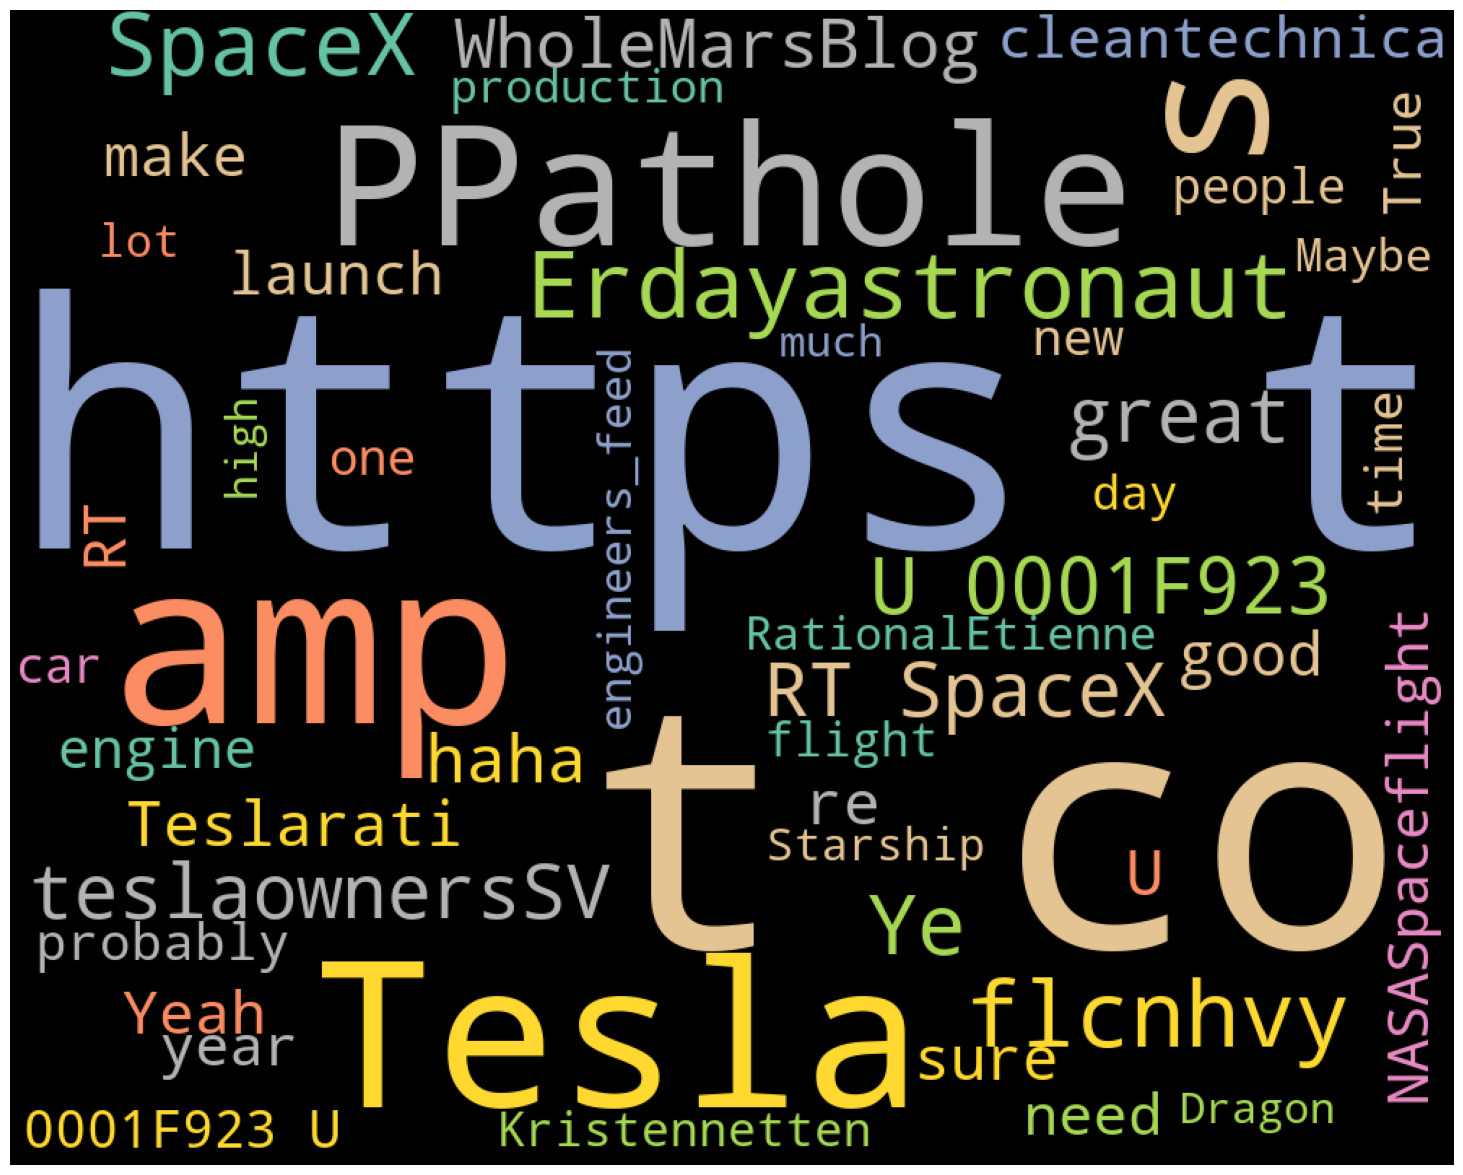

In [53]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1000, height = 800, background_color='black', max_words=50,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [54]:
wordcloud

In [ ]:
# Save image
#wordcloud.to_file("wordcloud.png")

Name entity recognition(NER)

In [55]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge all thought would fail himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx10 Haha thank flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyew httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s get real Bought Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha httpstcoFc9uhQSd7O freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar gateway together one mission ht

In [56]:
# Parts Of Speech (POS) Tagging
one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [57]:
for token in doc_block[100:200]:
    print(token,token.pos_)  

httpstcoFc9uhQSd7O PROPN
freewalletorg VERB
any DET
crypto NOUN
wallet NOUN
wont PROPN
give VERB
private ADJ
key ADJ
avoid NOUN
cost NOUN
freewalletorg NOUN
your PRON
app NOUN
suck NOUN
RT PROPN
SpaceX PROPN
NASA PROPN
select VERB
Falcon PROPN
Heavy PROPN
launch NOUN
first ADV
two NUM
element ADJ
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
httpstco3pwt X
ajtourville NOUN
yes INTJ
BLKMDL3 PROPN
RationalEtienne PROPN
Adamklotz PROPN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
Starlink PROPN
IPO PROPN
RationalEtienne PROPN
Adamklotz PROPN
Starlink PROPN
staggeringly ADV
difficult ADJ
technical ADJ
amp ADJ
economic ADJ
endeavor NOUN
however ADV
httpstco9z8ac6skqx NOUN
RationalEtienne PROPN
Adamklotz PROPN
SpaceX PROPN
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
httpstco7J1c92hdjl PROPN
IDAACarmack PROPN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
mu

In [58]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['unit', 'time', 'httpstco4UH4rARC6', 'kevinmgill', 'michaelhodapp', 'launch', 'tower', 'stack', 'orbit', 'booster', 'improve', 'ship', 'amp', 'booster', 'mass', 'michaelhodapp', 'work', 'tonight', 'video', 'httpstcoUEEocOfcTb', 'people', 'speak', 'httpstcox41ovmztgo', 'image', 'doesn\x92t', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'pain', 'u0001f3b6', 'let', 'rainforest', 'come', 'httpstcogf0rg2qoaf', 'fun', 'crypto', 'genesimmon', 'simplicity', 'genius', 'astrogdogg', 'u0001f923u0001f923', 'wapodavenport', 'decade', 'work', 'look', 'note', 'email', 'text', 'Lessons', 'learn', 'tell', 'story', 'theonion', 'read', 'hear', 'name', 'year', 'httpstcocnof9yjpf1', 'thing', 'restaurant', 'get', 'hang', 'currency', 'scratch', 'wonderofscience', 'woodhaus2', 'say', 'ship', 'landing', 'burn', 'solution', 'use', 'gas', 'maneuvering', 'RCS', 'thruster', 'seem', 'Raptors', 'mu', 'launch', 'collect', 'galaxy', 'explore', 'launch', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'm

In [59]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,amp,175
1,make,63
2,launch,57
3,spacex,57
4,teslaownerssv,49
5,year,47
6,work,47
7,need,44
8,go,43
9,get,38


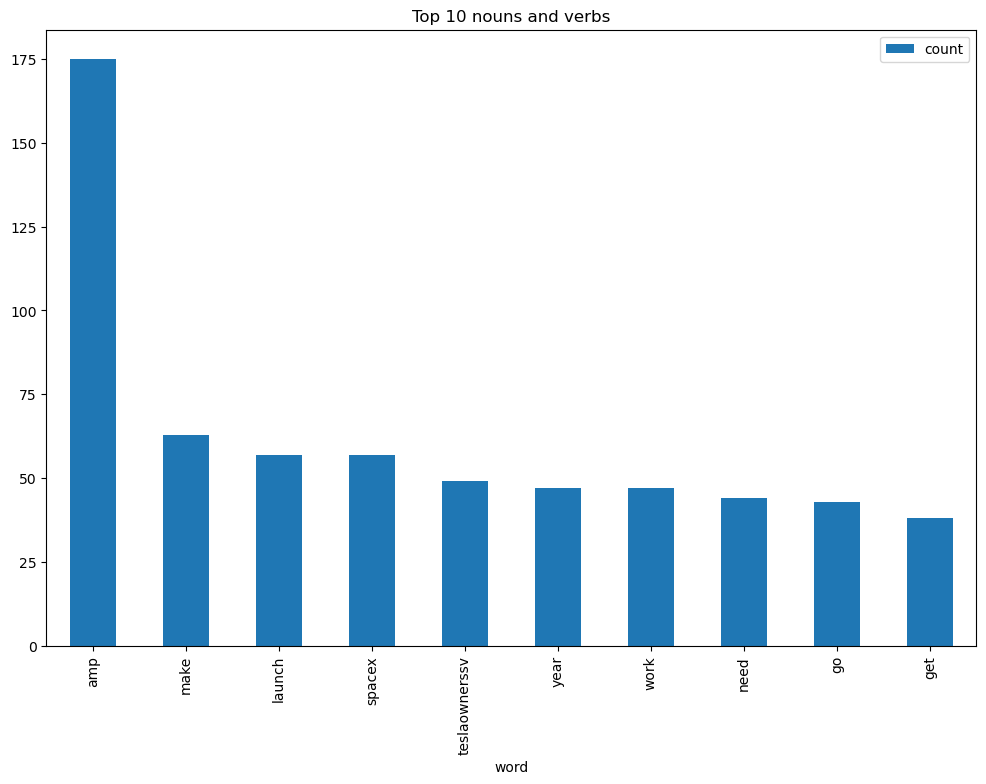

In [60]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion mining(Sentimental analysis)

In [61]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets2))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [62]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


# Getting the negative words affinity values.

In [63]:
afinn_n = pd.read_csv("negative-words.txt",sep=';', encoding='latin-1')
afinn_n=afinn_n.iloc[:,0]
afinn_n.dropna(inplace=True)
afinn_n=afinn_n.reset_index()
afinn_n['value']=-1
afinn_n.drop(['index'],axis=1,inplace=True)
afinn_n.columns=['words','value']
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [64]:
afinn_p = pd.read_csv("positive-words.txt",sep=';', encoding='latin-1')
afinn_p=afinn_p.iloc[:,0]
afinn_p.dropna(inplace=True)
afinn_p=afinn_p.reset_index()
afinn_p['value']=1
afinn_p.drop(['index'],axis=1,inplace=True)
afinn_p.columns=['words','value']
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [65]:
afinn=pd.concat([afinn_n,afinn_p],ignore_index=True)
afinn

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6784,youthful,1
6785,zeal,1
6786,zenith,1
6787,zest,1


In [66]:
affinity_scores = afinn.set_index('words')['value'].to_dict()
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

In [67]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [68]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      1
3      0
4      0
      ..
919    0
920   -1
921    0
922    0
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [69]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [70]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60
886,This is primarily an electrical/electronic (ch...,-4,69
329,"Their main PCR search is for the N1 gene, uniq...",-3,28
363,4D is essential for dynamically occluded objec...,-3,45
156,We couldnt get everything done in https://t....,-3,65
...,...,...,...
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65
580,"T https://t.co/DyNlT5EKGk @Model3Owners Fine,...",5,37
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231


In [71]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.456710
std        1.250468
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [72]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-1,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [73]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,1,4
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,1,10
10,https://t.co/3pWt @ajtourville Yes @BLKMDL3 @R...,1,28
14,"@tobyliiiiiiiiii This is intended for Earth, b...",1,38
17,Back to work I go @CapybaraSurfer @MattWallace...,1,38
...,...,...,...
909,Mass Effect 2 (talking about sequels) is amazing.,1,8
911,He was one of the very best.,1,7
913,"@Ali_Afshari In general, we need to improve ho...",1,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",1,15


In [74]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [76]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

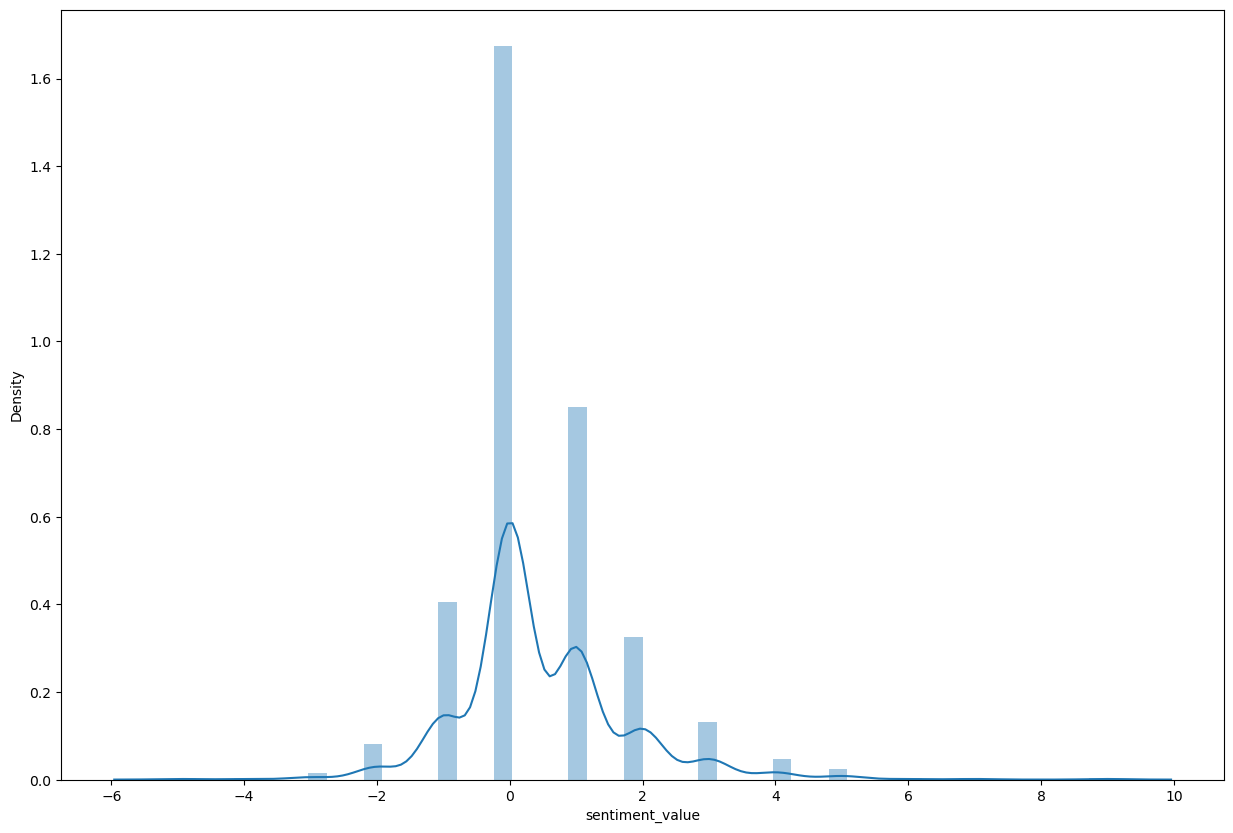

In [77]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

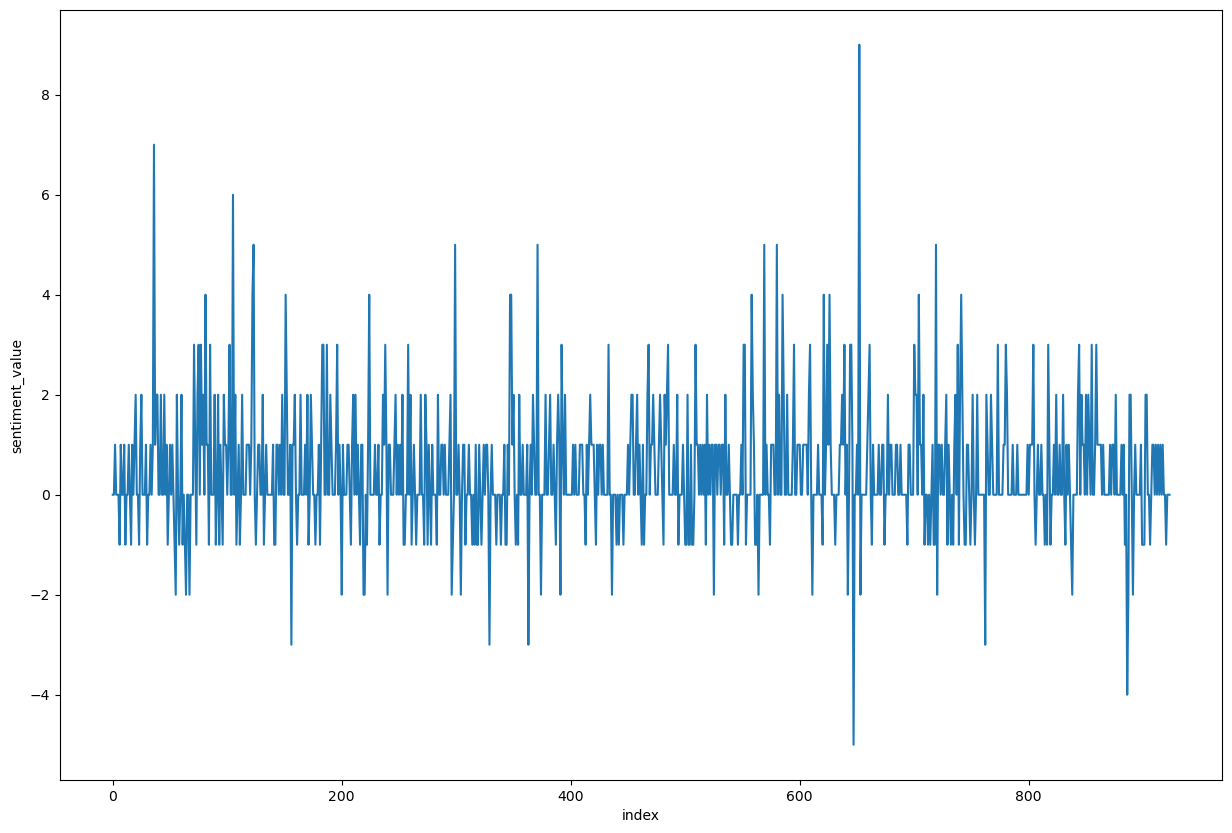

In [78]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

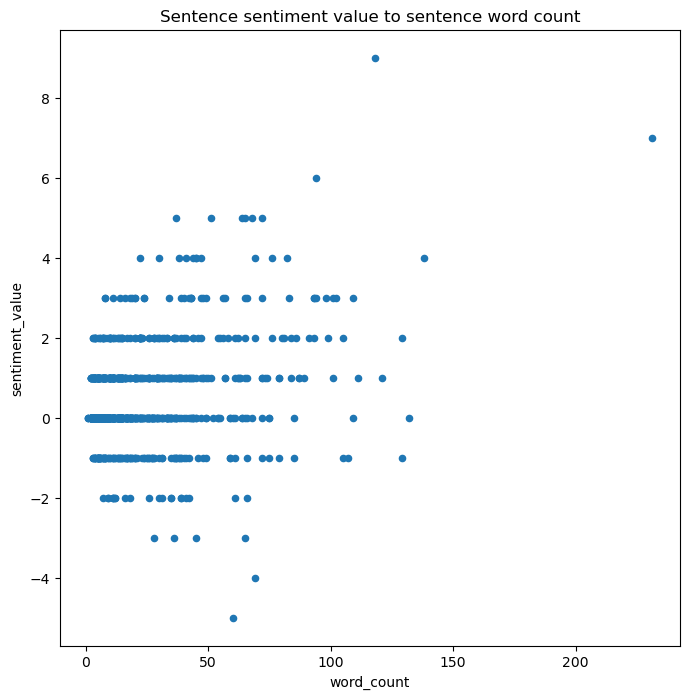

In [79]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')